<a href="https://colab.research.google.com/github/painterV/some_coding/blob/main/bipartitie_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#首先导入网络图的python库 networkx，重命名为nx
import networkx as nx

#新建一个网络图
G = nx.Graph()

In [ ]:
#向图中添加一个节点
G.add_node(1)

In [ ]:
G.add_nodes_from([2, 3])

In [ ]:
print(G)

Graph with 3 nodes and 0 edges


In [ ]:
G.add_edge(2,1)

In [ ]:
print(G)

Graph with 3 nodes and 1 edges


In [14]:
#导入networkx包重命名为nx
import networkx as nx
#从networkx.algorithms里导入bipartite
from networkx.algorithms import bipartite

# 定义 Physicians 类型的结点列表
Physicians = ['A', 'B', 'C', 'D', 'E', 'F']
# 定义 patients 类型的结点列表
patients = [1,2,3]

# 新建一个空的图
B = nx.Graph()
# 添加 Physicians 类型的结点到图中，注意要设置图的属性值 bipartite=0
B.add_nodes_from(Physicians, bipartite=0)
# 添加 patients 类型的结点到图中，注意要设置图的属性值 bipartite=1
B.add_nodes_from(patients, bipartite=1)
# 添加边
B.add_edges_from([('A', 1), ('A', 2), ('B', 2), ('C', 1), ('C', 2), ('D', 2), ('D', 3), ('E', 2), ('E', 3), ('F', 3)])

#for循环为每一条边初始化权重为1
for v, w in B.edges: 
    B.edges[v, w]["weight"] = 1


{'A': {1: {'weight': 1}, 2: {'weight': 1}}, 'B': {2: {'weight': 1}}, 'C': {1: {'weight': 1}, 2: {'weight': 1}}, 'D': {2: {'weight': 1}, 3: {'weight': 1}}, 'E': {2: {'weight': 1}, 3: {'weight': 1}}, 'F': {3: {'weight': 1}}, 1: {'A': {'weight': 1}, 'C': {'weight': 1}}, 2: {'A': {'weight': 1}, 'B': {'weight': 1}, 'C': {'weight': 1}, 'D': {'weight': 1}, 'E': {'weight': 1}}, 3: {'D': {'weight': 1}, 'E': {'weight': 1}, 'F': {'weight': 1}}}


{'E', 'D', 'B', 'C', 'F', 'A'}
{1, 2, 3}


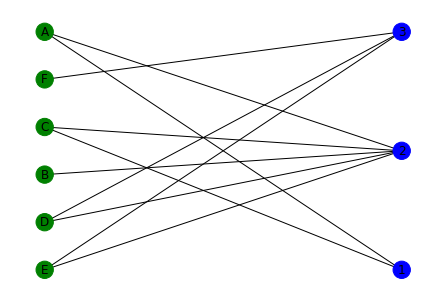

In [47]:
#导入画图的库pyplot
import matplotlib.pyplot as plt
top = nx.bipartite.sets(B)[0]
bottom = nx.bipartite.sets(B)[1]
print(top)
print(bottom)

pos = nx.bipartite_layout(B, top)
nx.draw(B, pos=pos, with_labels=True, node_color=['green','green','green','green', 'green', 'green','blue','blue','blue'], node_shape='o')
plt.show()

下方结点列表为：
{'E', 'D', 'B', 'C', 'F', 'A'}
上方结点列表为：
{1, 2, 3}
Physicians单图投射:
Graph with 6 nodes and 12 edges
Physicians单图投射的邻接矩阵为：
[[0. 2. 1. 1. 1. 1.]
 [2. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 0. 1.]
 [1. 1. 1. 0. 0. 2.]
 [1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 2. 0. 0.]]
Physicians单图投射可视化：


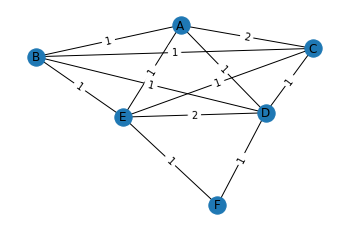

In [54]:
#获取邻接矩阵
bottom_nodes, top_nodes = bipartite.sets(B)
print("下方结点列表为：")
print(bottom_nodes)
print("上方结点列表为：")
print(top_nodes)

G = bipartite.weighted_projected_graph(B, bottom_nodes)

print("Physicians单图投射:")
print(G)
A = nx.to_numpy_array(G)

print("Physicians单图投射的邻接矩阵为：")
print(A)



# nx.draw(G,with_labels=True)
# plt.show()
# elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
# esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos)

# edges
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, edge_color="b")

# node labels
nx.draw_networkx_labels(G, pos)
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

print("Physicians单图投射可视化：")
plt.axis("off")
plt.show()

In [53]:
#pr值计算

pr_dic = nx.pagerank(G)

#对各结点根据pr值由大到小排序
s = sorted(pr_dic.items(), key=lambda x: x[1], reverse=True)

#输出pr值top 5的结点
print([item[0] for item in s[:5]])

['E', 'D', 'C', 'A', 'B']


In [63]:
##对patients类型的结点做上述同样的操作

def projection_and_topK_pr_nodes(B, nodes, k):

    #######Step1: 二部图投射到单类型结点
    G = bipartite.weighted_projected_graph(B, nodes)
    print("单图投射:")
    print(G)
    A = nx.to_numpy_array(G)
    print("单图投射的邻接矩阵为：")
    print(A)

    #######Step2: 投射图的可视化
    pos = nx.spring_layout(G)  # positions for all nodes - seed for reproducibility
    # nodes，先可视化点
    nx.draw_networkx_nodes(G, pos)
    # edges，可视化边
    nx.draw_networkx_edges(G, pos)
    # node labels，可视化标签
    nx.draw_networkx_labels(G, pos)
    # edge weight labels，可视化边的权重标签
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    print("单图投射可视化：")
    plt.axis("off")
    plt.show()

    #######Step3: 计算PR值，并打印top k的结点
    #计算pr值
    pr_dic = nx.pagerank(G)
    #对各结点根据pr值由大到小排序
    s = sorted(pr_dic.items(), key=lambda x: x[1], reverse=True)
    #输出pr值top 5的结点
    print("pr top ", k , "nodes", [item[0] for item in s[:k]])



#######patients结点
单图投射:
Graph with 3 nodes and 2 edges
单图投射的邻接矩阵为：
[[0. 2. 0.]
 [2. 0. 2.]
 [0. 2. 0.]]
单图投射可视化：


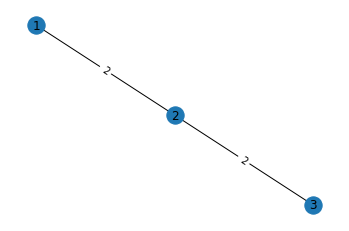

pr top  1 nodes [2]
#######physicians结点
单图投射:
Graph with 6 nodes and 12 edges
单图投射的邻接矩阵为：
[[0. 2. 1. 1. 1. 1.]
 [2. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 0. 1.]
 [1. 1. 1. 0. 0. 2.]
 [1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 2. 0. 0.]]
单图投射可视化：


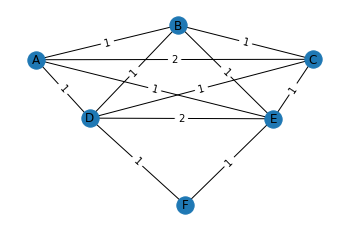

pr top  5 nodes ['E', 'D', 'C', 'A', 'B']


In [64]:
print("#######patients结点")
projection_and_topK_pr_nodes(B, top_nodes, 1)

print("#######physicians结点")
projection_and_topK_pr_nodes(B, bottom_nodes, 5)